In [1]:
# Load a couple of things from astroplan
from astroplan import Observer, FixedTarget

# And load Time from astropy
from astropy.time import Time

# Set plotting interface
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib import axes
import numpy as np

# Load a couple of things needed from astroplan
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_airmass, plot_finder_image

# Load astropy units module
import astropy.units as u

# Get Earth orientation info
from astroplan import download_IERS_A
download_IERS_A()

 ### Give information about when, where and what you're observing.

In [2]:
#Give a name to your observation location and provide coordinates.
feder = Observer(latitude="46.86678d", longitude="263.54672d")

This is where you can choose what targets you want to observe. The names and obs time in there are examples to show formatting, so make sure to remove them and replace them with your targets and obs time.

In [3]:
#Define your target(s).
target_names = ['KOI -0141','KOI -0005','KOI -0812']

targets = [FixedTarget.from_name(name) for name in target_names]

In [4]:
#Define a date and time (UTC) when you will be observing.
obs_time = Time("2018-07-21 02:00:00", scale='utc')

Run the following cell to display the RA and DEC of your targets. 

In [5]:
targets

[<FixedTarget "KOI -0141" at SkyCoord (ICRS): (ra, dec) in deg ( 288.0383,  50.6516111)>,
 <FixedTarget "KOI -0005" at SkyCoord (ICRS): (ra, dec) in deg ( 289.739725,  44.6474194)>,
 <FixedTarget "KOI -0812" at SkyCoord (ICRS): (ra, dec) in deg ( 286.0791083,  39.2783194)>]

### Now you're ready to plot the visibility of your objects over a night. 

Change obs_time1 to when you plan to observe, change the plot title and what you want to save it as. If you don't wish to save these figures, simply remove the 'plt.savefig'. 

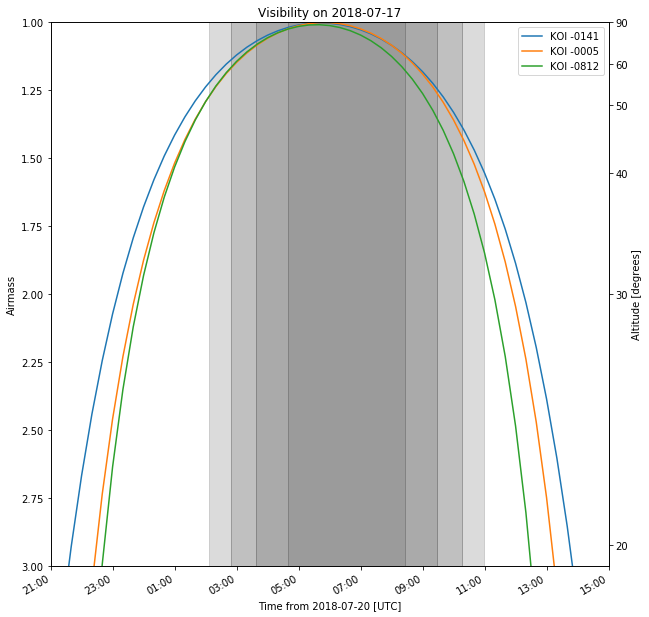

In [6]:
obs_time1 = Time("2018-07-21 02:00:00", scale='utc')
obs_time = obs_time1 + np.linspace(-5, 13, 55)*u.hour
ax = None
plt.figure(figsize=(10, 10))
for target in targets:
    ax = plot_airmass(target, feder, obs_time, ax=ax, 
                 brightness_shading=True, altitude_yaxis=True,
                )
ax.legend()
plt.title('Visibility on 2018-07-17')
plt.savefig('2018-07-21_obs_vis')

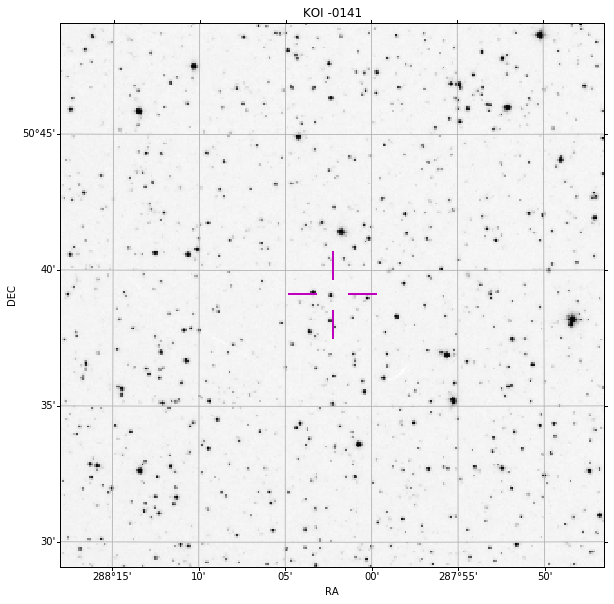

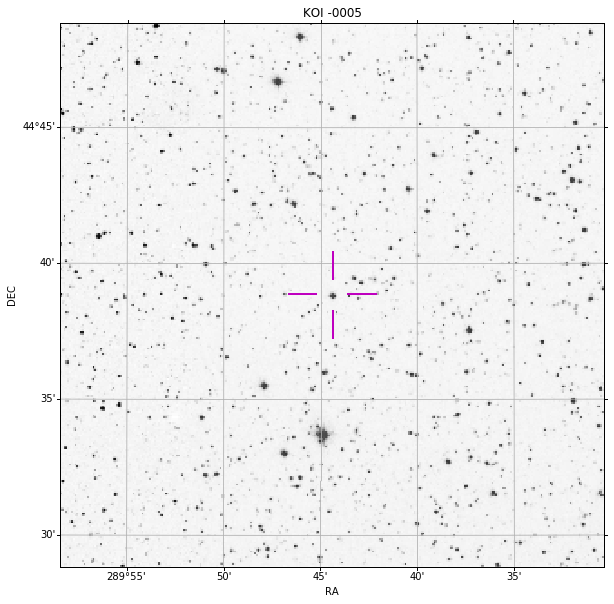

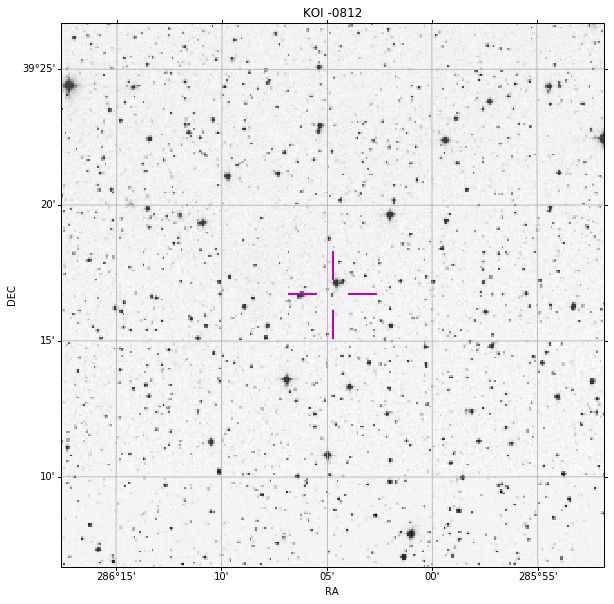

In [7]:
for target in targets:
    plt.figure(figsize=(10, 10))
    ax, hdu = plot_finder_image(target, fov_radius=20 * u.arcmin, reticle=True, grid=True)
    plt.savefig(target.name + '-finding')